In [27]:
import pandas as pd 
import numpy as  np
import matplotlib.pyplot as plt
import seaborn  as sns
import statsmodels.formula.api as smf


In [29]:
df=pd.read_csv('ToyotaCorolla.csv', encoding='latin1')

In [30]:
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# EDA

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [32]:
df=pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [33]:
df2=df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [34]:
df2.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [35]:
df2.duplicated().sum()

1

In [36]:
df2=df2.drop_duplicates().reset_index(drop=True)
df2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [37]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


# correlation analysis

In [38]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


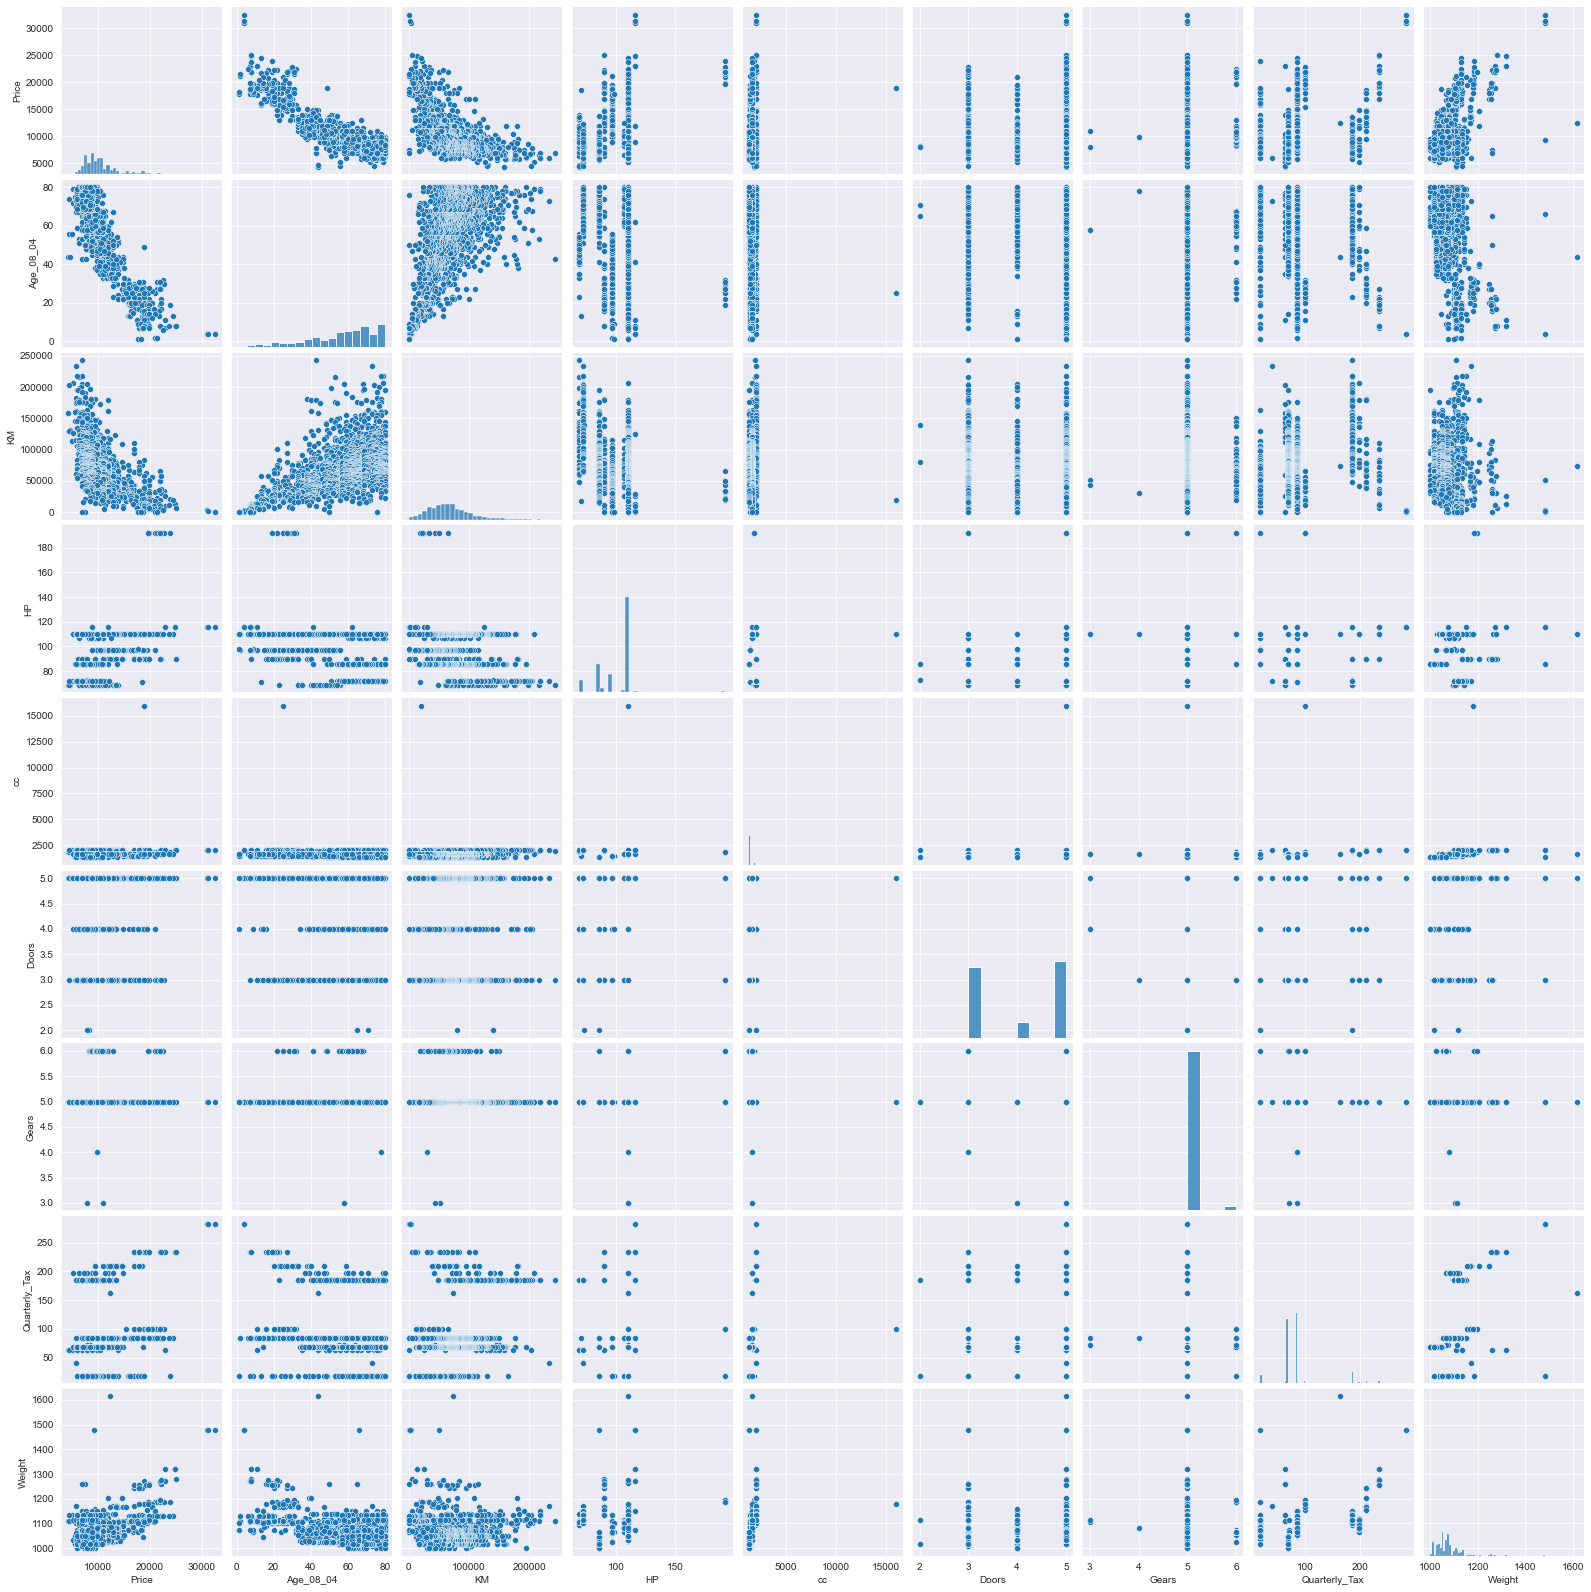

In [39]:
sns.set_style(style="darkgrid")
sns.pairplot(df)

# Model Building

In [40]:
model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=df2).fit()
model

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sat, 10 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:28:47   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# model testing 

In [42]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [43]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64 
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64


# simple linear regression models


In [44]:
ml_v=smf.ols("Price~CC",data=df2).fit()
print(ml_v.tvalues,'\n', ml_v.pvalues)

Intercept    24.879592
CC            4.745039
dtype: float64 
 Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64


In [45]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           2.29e-06
Time:                        13:28:47   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
CC             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
ml_v=smf.ols("Price~Doors",data=df2).fit()
print(ml_v.tvalues,'\n', ml_v.pvalues)

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [47]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           2.40e-12
Time:                        13:28:47   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
ml_v=smf.ols("Price~CC+Doors",data=df2).fit()
print(ml_v.tvalues,'\n', ml_v.pvalues)

Intercept    12.786341
CC            4.268006
Doors         6.752236
dtype: float64 
 Intercept    1.580945e-35
CC           2.101878e-05
Doors        2.109558e-11
dtype: float64


In [49]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           2.55e-15
Time:                        13:28:48   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
CC             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# calculating vif

In [50]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=df2).fit().rsquared
vif_age=1/(1-rsq_age)
rsq_km=smf.ols('KM~Age+HP+CC+QT+Weight+Doors+Gears',data=df2).fit().rsquared
vif_km=1/(1-rsq_km)
rsq_hp=smf.ols('HP~KM+CC+Age+QT+Weight+Doors+Gears',data=df2).fit().rsquared
vif_hp=1/(1-rsq_hp)
rsq_cc=smf.ols('CC~KM+HP+QT+Weight+Doors+Gears+Age',data=df2).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_qt=smf.ols('QT~CC+HP+KM+Weight+Doors+Gears+Age',data=df2).fit().rsquared
vif_qt=1/(1-rsq_qt)
rsq_wt=smf.ols('Weight~QT+HP+KM+Age+CC+Doors+Gears',data=df2).fit().rsquared
vif_wt=1/(1-rsq_wt)
rsq_dr=smf.ols('Doors~Weight+QT+HP+KM+Age+CC+Gears',data=df2).fit().rsquared
vif_dr=1/(1-rsq_dr)
rsq_gr=smf.ols('Gears~Weight+QT+HP+KM+Age+CC+Doors',data=df2).fit().rsquared
vif_gr=1/(1-rsq_gr)
 
#putting the values in dataframe format

d1={'Variables':["Age","KM","HP","CC","QT","Weight","Doors","Gears"],'vif':[vif_age,vif_km,vif_hp,vif_cc,vif_qt,vif_wt,vif_dr,vif_gr]}
vif_df2=pd.DataFrame(d1)
vif_df2


,Variables,vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,QT,2.295375
5,Weight,2.487180
6,Doors,1.155890
7,Gears,1.098843


In [56]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [58]:
import statsmodels.api as sm

C:\Users\shaki\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


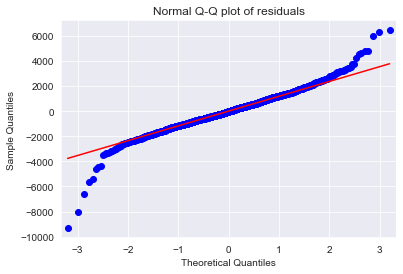

In [59]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [60]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [61]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [62]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

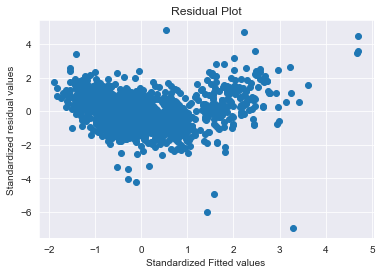

In [63]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

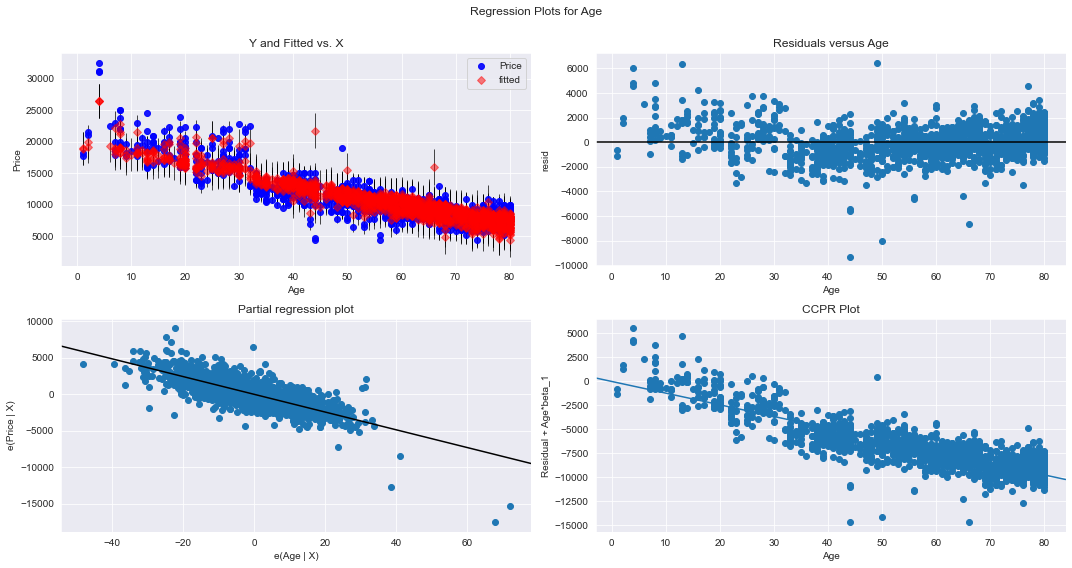

In [74]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

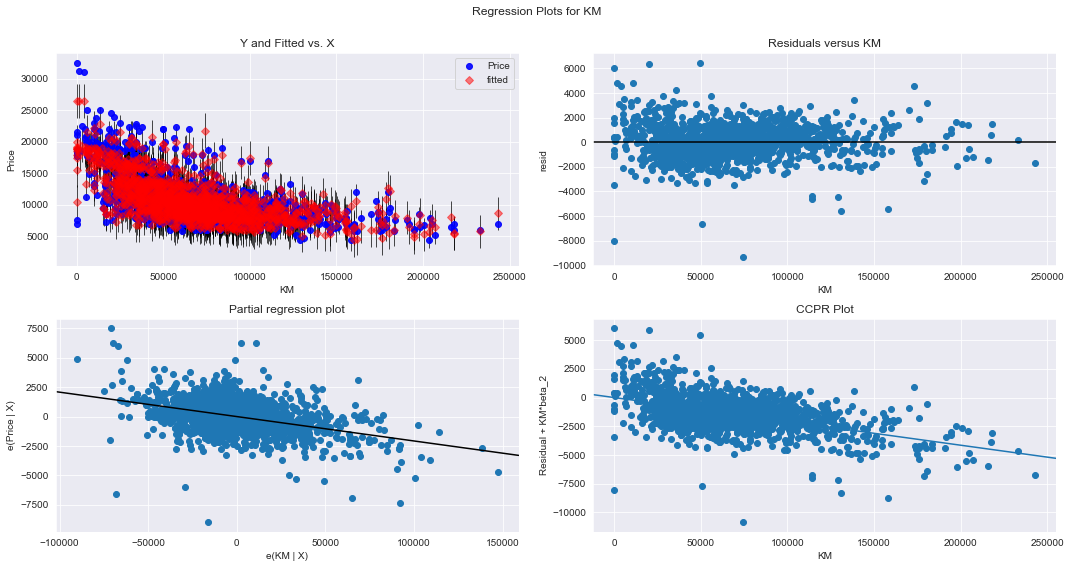

In [75]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

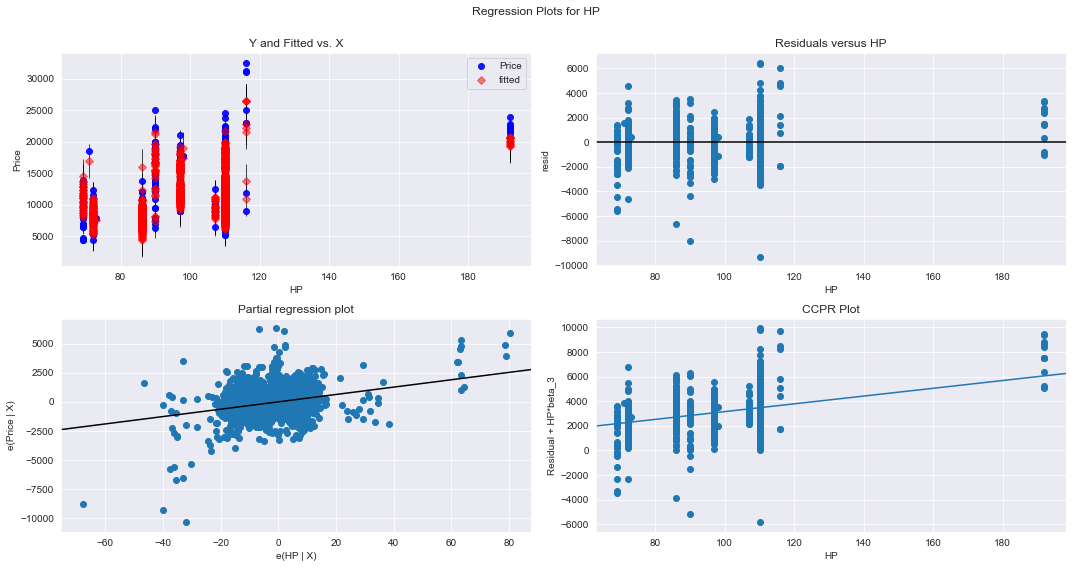

In [76]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

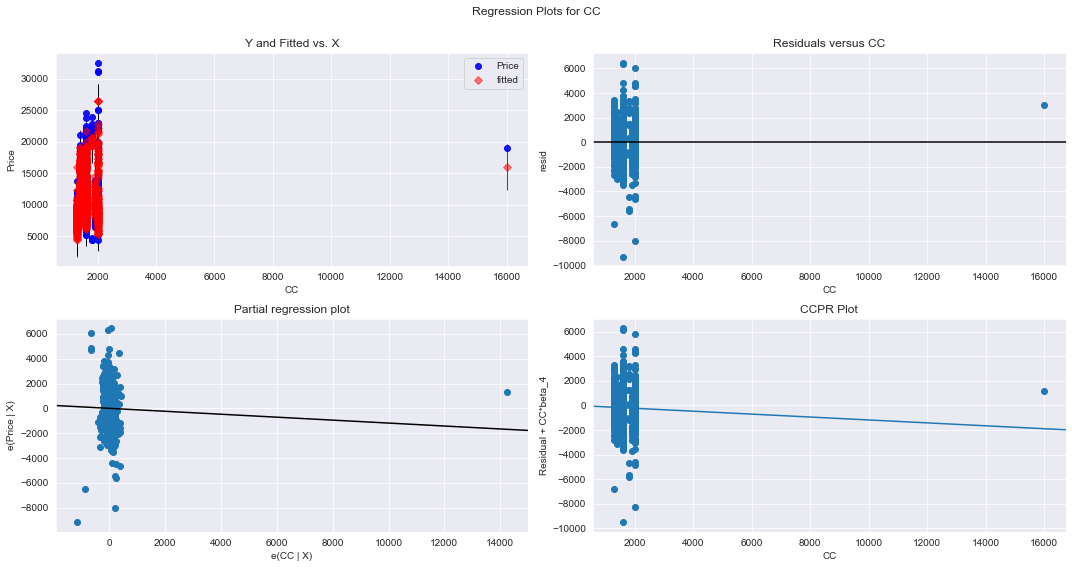

In [77]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

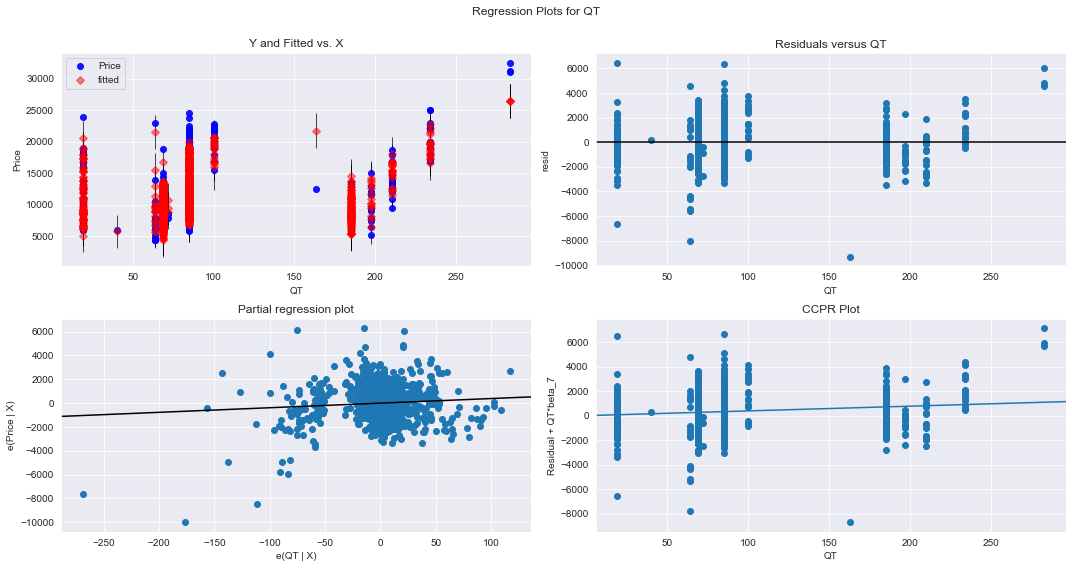

In [78]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

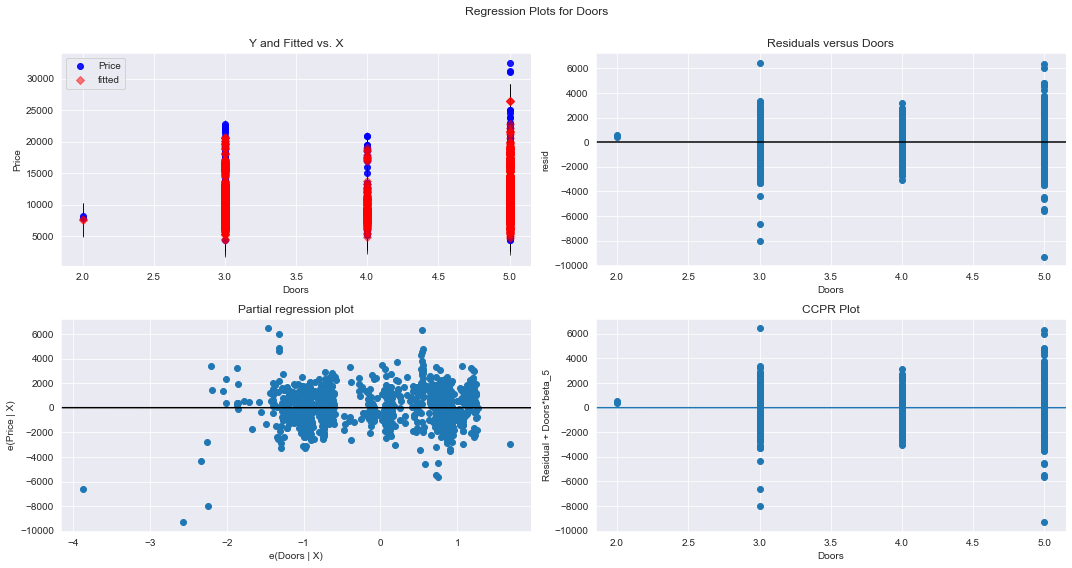

In [79]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

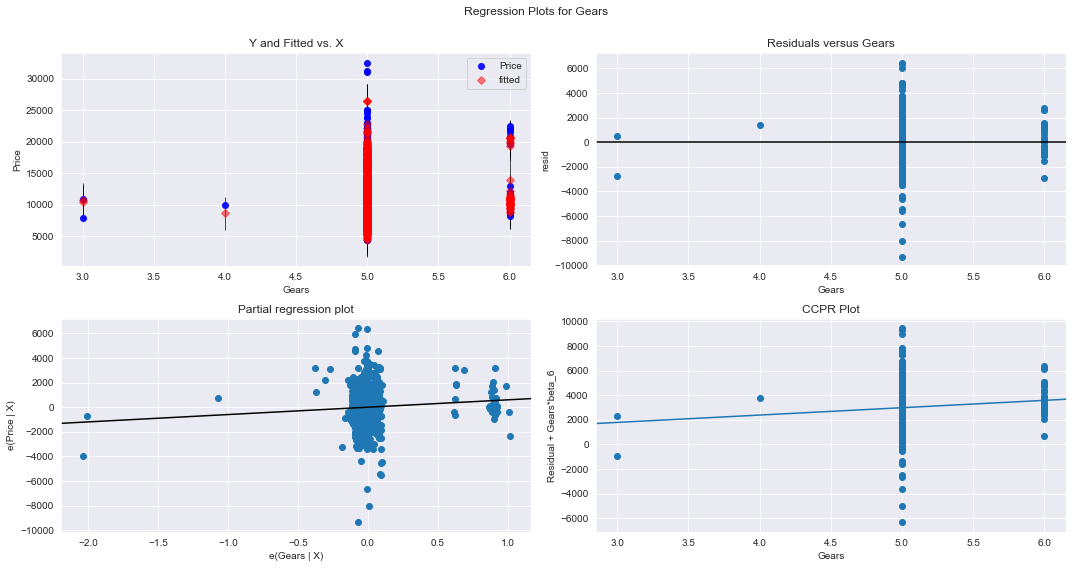

In [80]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

# cook's distance

In [64]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

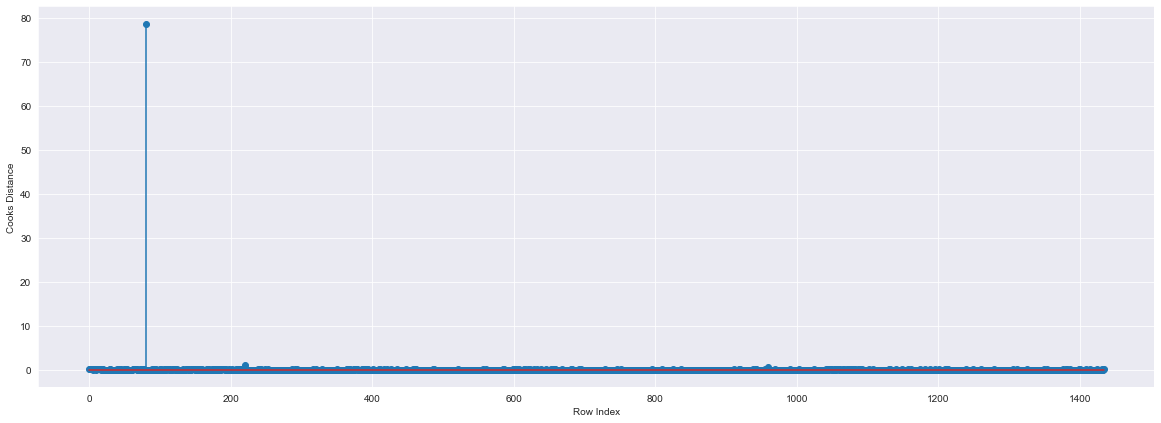

In [73]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [81]:
np.argmax(c), np.max(c)

(80, 78.72950582248232)

In [83]:
k=df2.shape[1]
n=df2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [84]:
df2[df2.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# improving the model

In [85]:
df_new=df2.copy()
df_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [86]:
df3=df_new.drop(df_new.index[[80]],axis=0).reset_index(drop=True)
df3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [89]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df3).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df3=df3.drop(df3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df3
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df3).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [91]:
final_model.rsquared

0.8882395145171204

In [92]:
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [93]:
final_model.predict(new_data)

0    14341.570181
dtype: float64

In [95]:
pred_y=final_model.predict(df3)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64